This notebook is about community comparison.

## Import Data

In [1]:
# importing python libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

In [3]:
# read and add shapefile to notebook
df = pd.read_csv('Data/R13562211_SL140.csv')

In [5]:
# convert FIPS, STATE, and COUNTY to string
df = pd.read_csv(
    'Data/R13562211_SL140.csv',
    dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str
    }
)

In [6]:
# check data 
df.head()

,Geo_FIPS,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATE,Geo_COUNTY,...,SE_A12002_006,SE_A12002_007,SE_A12002_008,PCT_SE_A12002_002,PCT_SE_A12002_003,PCT_SE_A12002_004,PCT_SE_A12002_005,PCT_SE_A12002_006,PCT_SE_A12002_007,PCT_SE_A12002_008
0,06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,06,037,...,157,32,19,8.18,23.15,39.76,22.25,5.03,1.03,0.61
1,06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,06,037,...,357,61,126,16.09,15.36,30.14,21.04,11.40,1.95,4.02
2,06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,06,037,...,163,33,20,23.24,18.83,28.98,20.51,6.37,1.29,0.78
3,06037101221,"Census Tract 1012.21, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,06,037,...,178,23,56,25.88,16.55,30.35,17.64,6.64,0.86,2.09
4,06037101222,"Census Tract 1012.22, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,06,037,...,29,12,0,14.11,33.88,39.95,10.10,1.39,0.57,0.00


In [7]:
# confirm the columns have correct data type
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 60 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           2498 non-null   object 
 1   Geo_QName          2498 non-null   object 
 2   Geo_STUSAB         2498 non-null   object 
 3   Geo_SUMLEV         2498 non-null   int64  
 4   Geo_GEOCOMP        2498 non-null   int64  
 5   Geo_US             0 non-null      float64
 6   Geo_REGION         0 non-null      float64
 7   Geo_DIVISION       0 non-null      float64
 8   Geo_STATE          2498 non-null   object 
 9   Geo_COUNTY         2498 non-null   object 
 10  Geo_COUSUB         0 non-null      float64
 11  Geo_PLACE          0 non-null      float64
 12  Geo_TRACT          2498 non-null   int64  
 13  Geo_BLKGRP         0 non-null      float64
 14  Geo_CONCIT         0 non-null      float64
 15  Geo_AIANHH         0 non-null      float64
 16  Geo_AIANHHFP       0 non

In [8]:
# check which columns are null columns
df.columns[df.isna().all()].tolist()

['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_BLKGRP',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_CNECTA',
 'Geo_NECTADIV',
 'Geo_UA',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_ZCTA3',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_PUMA5',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PLACESE']

In [9]:
# delete null columns
df = df.dropna(axis=1,how="all")

In [10]:
# check data information again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           2498 non-null   object 
 1   Geo_QName          2498 non-null   object 
 2   Geo_STUSAB         2498 non-null   object 
 3   Geo_SUMLEV         2498 non-null   int64  
 4   Geo_GEOCOMP        2498 non-null   int64  
 5   Geo_STATE          2498 non-null   object 
 6   Geo_COUNTY         2498 non-null   object 
 7   Geo_TRACT          2498 non-null   int64  
 8   Geo_NAME           2498 non-null   object 
 9   SE_A12002_001      2498 non-null   int64  
 10  SE_A12002_002      2498 non-null   int64  
 11  SE_A12002_003      2498 non-null   int64  
 12  SE_A12002_004      2498 non-null   int64  
 13  SE_A12002_005      2498 non-null   int64  
 14  SE_A12002_006      2498 non-null   int64  
 15  SE_A12002_007      2498 non-null   int64  
 16  SE_A12002_008      2498 

In [11]:
# display and check the fisrt 5 row
df.head()

,Geo_FIPS,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_STATE,Geo_COUNTY,Geo_TRACT,Geo_NAME,SE_A12002_001,...,SE_A12002_006,SE_A12002_007,SE_A12002_008,PCT_SE_A12002_002,PCT_SE_A12002_003,PCT_SE_A12002_004,PCT_SE_A12002_005,PCT_SE_A12002_006,PCT_SE_A12002_007,PCT_SE_A12002_008
0,06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",ca,140,0,06,037,101110,Census Tract 1011.10,3119,...,157,32,19,8.18,23.15,39.76,22.25,5.03,1.03,0.61
1,06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",ca,140,0,06,037,101122,Census Tract 1011.22,3132,...,357,61,126,16.09,15.36,30.14,21.04,11.40,1.95,4.02
2,06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",ca,140,0,06,037,101220,Census Tract 1012.20,2560,...,163,33,20,23.24,18.83,28.98,20.51,6.37,1.29,0.78
3,06037101221,"Census Tract 1012.21, Los Angeles County, Cali...",ca,140,0,06,037,101221,Census Tract 1012.21,2682,...,178,23,56,25.88,16.55,30.35,17.64,6.64,0.86,2.09
4,06037101222,"Census Tract 1012.22, Los Angeles County, Cali...",ca,140,0,06,037,101222,Census Tract 1012.22,2090,...,29,12,0,14.11,33.88,39.95,10.10,1.39,0.57,0.00


In [12]:
# define the columns that I want to keep
columns_to_keep = ['Geo_FIPS',
                   'SE_A12002_001',
                   'SE_A12002_002',
                   'SE_A12002_003',
                   'SE_A12002_004',
                   'SE_A12002_005',
                   'SE_A12002_006',
                   'SE_A12002_007',
                   'SE_A12002_008']

In [13]:
# save these columns
df2 = df[columns_to_keep]

In [14]:
# return list of columns
columns = list(df2) 
columns

['Geo_FIPS',
 'SE_A12002_001',
 'SE_A12002_002',
 'SE_A12002_003',
 'SE_A12002_004',
 'SE_A12002_005',
 'SE_A12002_006',
 'SE_A12002_007',
 'SE_A12002_008']

In [15]:
# rename these columns
df2.columns = ['FIPS',
'Population 25 Years and Over',
'Less than High School',
'High School Graduate',
'Some College',
'Bachelor',
'Master',
'Professional School',
'Doctorate']

In [16]:
# display five random samples to confirm the columns rename successfully
df2.sample(5)

,FIPS,Population 25 Years and Over,Less than High School,High School Graduate,Some College,Bachelor,Master,Professional School,Doctorate
1058,06037293301,2021,104,321,572,794,181,23,26
761,06037222700,291,7,12,91,117,59,0,5
1887,06037553503,2057,942,623,357,81,54,0,0
841,06037236101,2043,305,394,720,447,157,9,11
1458,06037460302,2962,220,334,866,883,453,206,0


In [20]:
# read in a geojson file 
tracts=gpd.read_file('Data/2020_Census_Tracts.geojson')
tracts.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,4992,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.29793 34.26323, -118.30082 34.2..."
1,4993,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.27743 34.25991, -118.27743 34.2..."
2,4994,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.27818 34.25577, -118.27887 34.2..."
3,4995,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,4996,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25590, -118.28697 34.2..."


<Axes: >

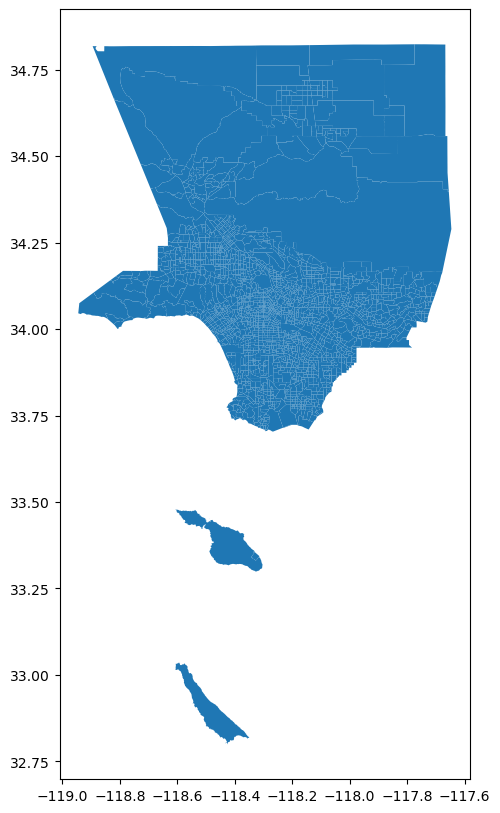

In [21]:
# plot it
tracts.plot(figsize=(12,10))

In [22]:
# info about this dataset
tracts.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2496 entries, 0 to 2495
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       2496 non-null   int64   
 1   CT20           2496 non-null   object  
 2   LABEL          2496 non-null   object  
 3   ShapeSTArea    2496 non-null   float64 
 4   ShapeSTLength  2496 non-null   float64 
 5   geometry       2496 non-null   geometry
dtypes: float64(2), geometry(1), int64(1), object(2)
memory usage: 117.1+ KB


In [23]:
# only keep FIPS and geometry
tracts = tracts[['CT20','geometry']]
tracts.head()

,CT20,geometry
0,101110,"POLYGON ((-118.29793 34.26323, -118.30082 34.2..."
1,101122,"POLYGON ((-118.27743 34.25991, -118.27743 34.2..."
2,101220,"POLYGON ((-118.27818 34.25577, -118.27887 34.2..."
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,101222,"POLYGON ((-118.28594 34.25590, -118.28697 34.2..."


In [24]:
# create a FIPS column
tracts['FIPS'] ='06' + '037' + tracts['CT20']

/opt/conda/lib/python3.11/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [25]:
# check it
tracts.head()

,CT20,geometry,FIPS
0,101110,"POLYGON ((-118.29793 34.26323, -118.30082 34.2...",06037101110
1,101122,"POLYGON ((-118.27743 34.25991, -118.27743 34.2...",06037101122
2,101220,"POLYGON ((-118.27818 34.25577, -118.27887 34.2...",06037101220
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221
4,101222,"POLYGON ((-118.28594 34.25590, -118.28697 34.2...",06037101222


In [26]:
# create a new dataframe based on the join
tracts['FIPS'] = tracts['FIPS'].astype(int)
df2['FIPS'] = df2['FIPS'].astype(int)

# Merge the DataFrames
tracts_education = tracts.merge(df2, on='FIPS')

/opt/conda/lib/python3.11/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/tmp/ipykernel_151/2941396304.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['FIPS'] = df2['FIPS'].astype(int)


In [27]:
# check it
tracts_education.head()

,CT20,geometry,FIPS,Population 25 Years and Over,Less than High School,High School Graduate,Some College,Bachelor,Master,Professional School,Doctorate
0,101110,"POLYGON ((-118.29793 34.26323, -118.30082 34.2...",6037101110,3119,255,722,1240,694,157,32,19
1,101122,"POLYGON ((-118.27743 34.25991, -118.27743 34.2...",6037101122,3132,504,481,944,659,357,61,126
2,101220,"POLYGON ((-118.27818 34.25577, -118.27887 34.2...",6037101220,2560,595,482,742,525,163,33,20
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",6037101221,2682,694,444,814,473,178,23,56
4,101222,"POLYGON ((-118.28594 34.25590, -118.28697 34.2...",6037101222,2090,295,708,835,211,29,12,0


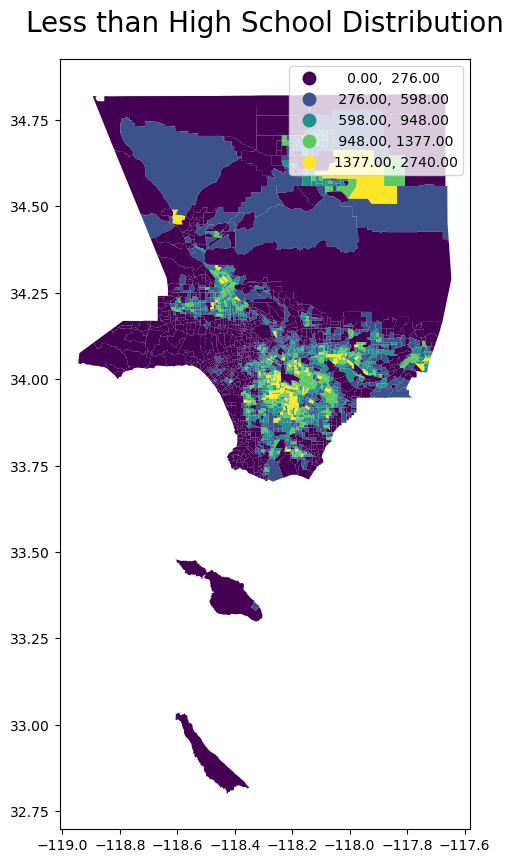

In [28]:
# create choropleth maps in geopandas
fig, ax = plt.subplots(1, figsize=(12, 10))
tracts_education.plot(ax=ax,
                   column='Less than High School',
                   legend=True,
                   scheme='NaturalBreaks')

ax.set_title('Less than High School Distribution', fontdict={'fontsize': 20}, pad=20)

plt.savefig('Less than High School Distribution3')
plt.show()

Lower educational attainment households are mostly distributed in the bottom central area.

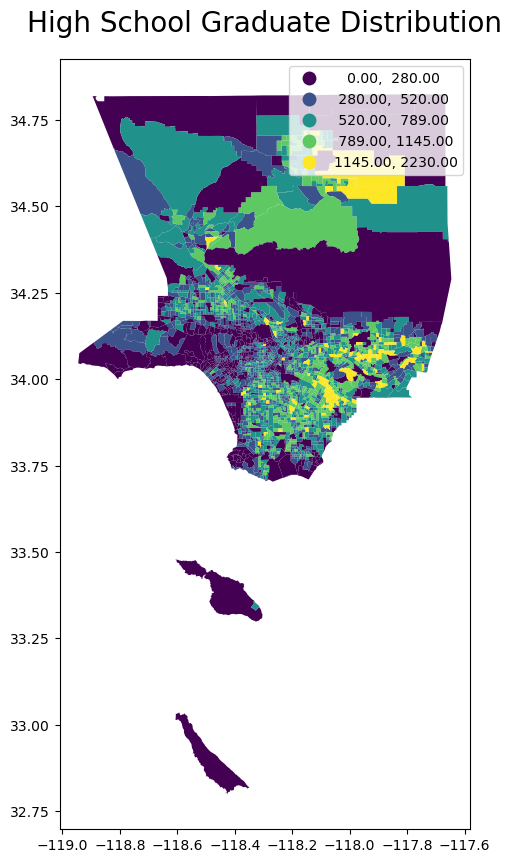

In [29]:
# create choropleth maps in geopandas
fig, ax = plt.subplots(1, figsize=(12, 10))
tracts_education.plot(ax=ax,
                   column='High School Graduate',
                   legend=True,
                   scheme='NaturalBreaks')

ax.set_title('High School Graduate Distribution', fontdict={'fontsize': 20}, pad=20)

plt.savefig('High School Graduate Distribution3')
plt.show()

Middle educational attainment households are mostly distributed in the bottom right.

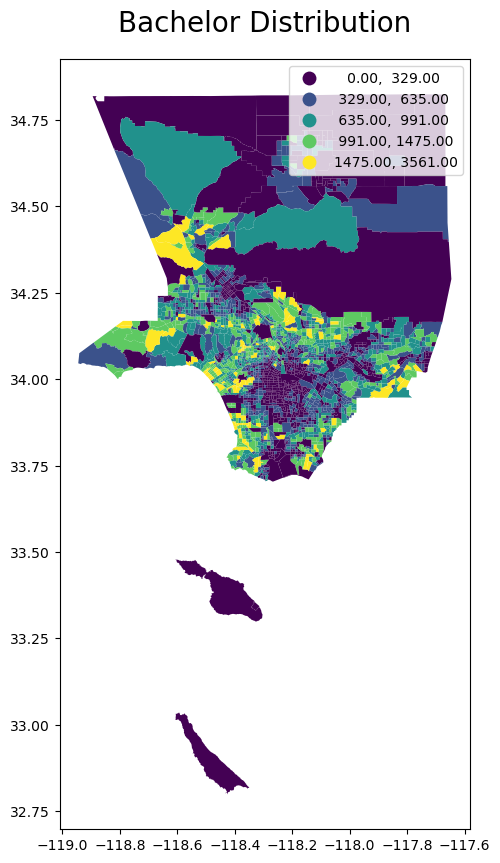

In [30]:
# create choropleth maps in geopandas
fig, ax = plt.subplots(1, figsize=(12, 10))
tracts_education.plot(ax=ax,
                   column='Bachelor',
                   legend=True,
                   scheme='NaturalBreaks')

ax.set_title('Bachelor Distribution', fontdict={'fontsize': 20}, pad=20)

plt.savefig('Bachelor Distribution3')
plt.show()

High educational attainment households are mostly distributed in the bottom left.

Based on observing the maps, we initially concluded that the low educational attainment distribution choropleth map is more consistent with the traffic accidents distribution pattern, both of them are concentrated in the central area of Los Angeles. In order to determine the relationship between household educational attainment and traffic safety, we still need further analysis through community comparison.

## PACIFIC PALISADES Community Plot

In [31]:
# show rows that Latitude is not empty
tracts_education[tracts_education['FIPS'].isin([6037262501, 6037262601, 6037262604, 6037262704, 6037262706, 6037262802])]

,CT20,geometry,FIPS,Population 25 Years and Over,Less than High School,High School Graduate,Some College,Bachelor,Master,Professional School,Doctorate
921,262501,"POLYGON ((-118.51137 34.05079, -118.51157 34.0...",6037262501,2453,0,123,385,804,445,476,220
922,262601,"POLYGON ((-118.53802 34.06373, -118.53815 34.0...",6037262601,2377,92,193,380,807,564,179,162
2438,262604,"POLYGON ((-118.53802 34.06373, -118.54339 34.0...",6037262604,4106,1,232,789,1664,654,633,133
2439,262704,"MULTIPOLYGON (((-118.52945 34.04889, -118.5294...",6037262704,2535,15,110,483,980,565,288,94
2440,262706,"POLYGON ((-118.52924 34.04971, -118.52931 34.0...",6037262706,2256,27,85,251,908,498,378,109
2441,262802,"POLYGON ((-118.49403 34.06047, -118.49414 34.0...",6037262802,2604,30,75,326,904,574,582,113


In [32]:
# trimming the dataset
data_trimmed = tracts_education[tracts_education['FIPS'].isin([6037262501, 6037262601, 6037262604, 6037262704, 6037262706, 6037262802])]
data_trimmed

,CT20,geometry,FIPS,Population 25 Years and Over,Less than High School,High School Graduate,Some College,Bachelor,Master,Professional School,Doctorate
921,262501,"POLYGON ((-118.51137 34.05079, -118.51157 34.0...",6037262501,2453,0,123,385,804,445,476,220
922,262601,"POLYGON ((-118.53802 34.06373, -118.53815 34.0...",6037262601,2377,92,193,380,807,564,179,162
2438,262604,"POLYGON ((-118.53802 34.06373, -118.54339 34.0...",6037262604,4106,1,232,789,1664,654,633,133
2439,262704,"MULTIPOLYGON (((-118.52945 34.04889, -118.5294...",6037262704,2535,15,110,483,980,565,288,94
2440,262706,"POLYGON ((-118.52924 34.04971, -118.52931 34.0...",6037262706,2256,27,85,251,908,498,378,109
2441,262802,"POLYGON ((-118.49403 34.06047, -118.49414 34.0...",6037262802,2604,30,75,326,904,574,582,113


In [33]:
# define variable
df_sorted = data_trimmed.sort_values(by='Less than High School',ascending = False)

In [34]:
# display data 
df_sorted[['FIPS','Less than High School']]

,FIPS,Less than High School
922,6037262601,92
2441,6037262802,30
2440,6037262706,27
2439,6037262704,15
2438,6037262604,1
921,6037262501,0


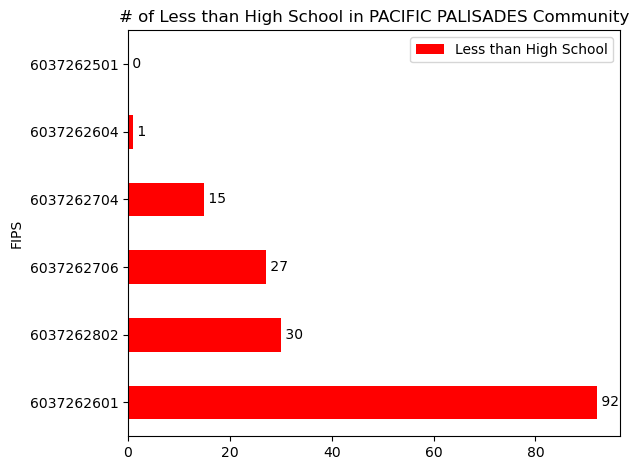

In [35]:
# make the figure looks better

ax = df_sorted.plot.barh(x='FIPS',
                            y='Less than High School', 
                            title='# of Less than High School in PACIFIC PALISADES Community',
                            color='red')

# add number for each column
# define numbers
numbers = [92, 30, 27, 15, 1, 0]
for i, bar in enumerate(ax.patches):
    plt.text(bar.get_width(),  # set the horizontal position to the end of the bar
             bar.get_y() + bar.get_height() / 2,  # set the vertical position to the center of the bar
             f' {numbers[i]}',  # display number
             va='center')  # center alignment

plt.tight_layout()
plt.savefig('Number of Less than High School in PACIFIC PALISADES Community')
plt.show()

In Pacific Palisades community, census tract 6037262601 has the most low educational attainment households, with 92. Census tract 6037262501 has the fewest low educational attainment households, with 0.

In [36]:
# define variable
df_sorted = data_trimmed.sort_values(by='High School Graduate',ascending = False)
# display data 
df_sorted[['FIPS','High School Graduate']]

,FIPS,High School Graduate
2438,6037262604,232
922,6037262601,193
921,6037262501,123
2439,6037262704,110
2440,6037262706,85
2441,6037262802,75


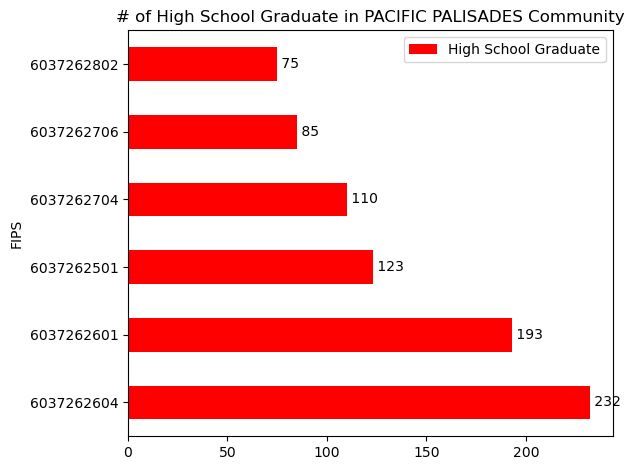

In [37]:
# make the figure looks better
ax = df_sorted.plot.barh(x='FIPS',
                            y='High School Graduate', 
                            title='# of High School Graduate in PACIFIC PALISADES Community',
                            color='red')

# add number for each column
# define numbers
numbers = [232, 193, 123, 110, 85, 75]
for i, bar in enumerate(ax.patches):
    plt.text(bar.get_width(),  # set the horizontal position to the end of the bar
             bar.get_y() + bar.get_height() / 2,  # set the vertical position to the center of the bar
             f' {numbers[i]}',  # display number
             va='center')  # center alignment

plt.tight_layout()
plt.savefig('Number of High School Graduate in PACIFIC PALISADES Community')
plt.show()

In Pacific Palisades community, census tract 6037262604 has the most middle educational attainment households, with 232. Census tract 6037262802 has the fewest middle educational attainment households, with 75.

In [38]:
# define variable
df_sorted = data_trimmed.sort_values(by='Bachelor',ascending = False)
# display data 
df_sorted[['FIPS','Bachelor']]

,FIPS,Bachelor
2438,6037262604,1664
2439,6037262704,980
2440,6037262706,908
2441,6037262802,904
922,6037262601,807
921,6037262501,804


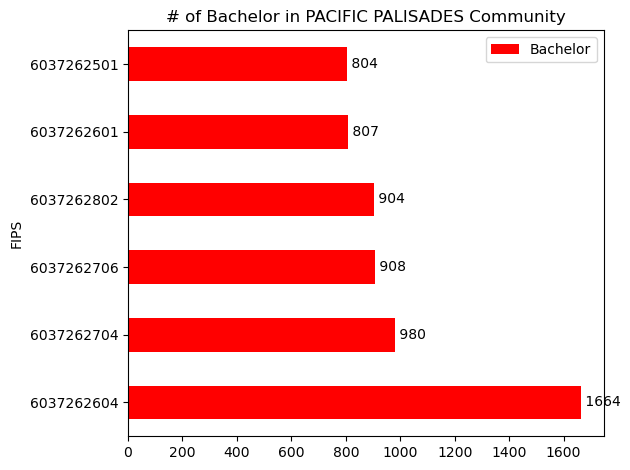

In [39]:
# make the figure looks better
ax = df_sorted.plot.barh(x='FIPS',
                            y='Bachelor', 
                            title='# of Bachelor in PACIFIC PALISADES Community',
                            color='red')

# add number for each column
# define numbers
numbers = [1664, 980, 908, 904, 807, 804]
for i, bar in enumerate(ax.patches):
    plt.text(bar.get_width(),  # set the horizontal position to the end of the bar
             bar.get_y() + bar.get_height() / 2,  # set the vertical position to the center of the bar
             f' {numbers[i]}',  # display number
             va='center')  # center alignment

plt.tight_layout()
plt.savefig('Number of Bachelor in PACIFIC PALISADES Community')
plt.show()

In Pacific Palisades community, census tract 6037262604 has the most high educational attainment households, with 1664. Census tract 6037262501 has the fewest high educational attainment households, with 804.

## DOWNTOWN LA Community Plot

In [40]:
# show rows that Latitude is not empty
tracts_education[tracts_education['FIPS'].isin([6037206051, 6037206052, 6037206201, 6037206202, 6037206301, 6037206302, 6037206303, 6037207303, 6037207304, 6037207305, 6037207306, 6037207307, 6037207308, 6037207501, 6037207502, 6037207711, 6037207712, 6037207901, 6037207902, 6037224010, 6037224020, 6037226001, 6037226002, 6037207400])]

,CT20,geometry,FIPS,Population 25 Years and Over,Less than High School,High School Graduate,Some College,Bachelor,Master,Professional School,Doctorate
582,206051,"POLYGON ((-118.22883 34.04155, -118.22898 34.0...",6037206051,1291,0,124,253,646,144,124,0
583,206052,"POLYGON ((-118.22880 34.05302, -118.22896 34.0...",6037206052,2598,17,83,423,1188,506,314,67
586,206201,"POLYGON ((-118.24087 34.05041, -118.24216 34.0...",6037206201,2005,176,352,462,654,217,110,34
587,206202,"POLYGON ((-118.23805 34.05107, -118.23971 34.0...",6037206202,1771,227,283,502,487,195,57,20
588,206301,"POLYGON ((-118.24500 34.04459, -118.24565 34.0...",6037206301,2073,400,665,816,155,37,0,0
589,206302,"POLYGON ((-118.24390 34.04420, -118.24500 34.0...",6037206302,2133,517,686,796,95,11,28,0
590,206303,"POLYGON ((-118.23812 34.04328, -118.23949 34.0...",6037206303,2628,710,1024,714,139,41,0,0
594,207303,"POLYGON ((-118.25338 34.04522, -118.25393 34.0...",6037207303,2218,205,412,465,772,241,101,22
595,207304,"POLYGON ((-118.24964 34.04739, -118.25017 34.0...",6037207304,1831,322,242,868,219,103,77,0
596,207305,"POLYGON ((-118.24562 34.05171, -118.24669 34.0...",6037207305,704,60,65,162,313,94,0,10


In [41]:
# trimming the dataset
data_trimmed = tracts_education[tracts_education['FIPS'].isin([6037206051, 6037206052, 6037206201, 6037206202, 6037206301, 6037206302, 6037206303, 6037207303, 6037207304, 6037207305, 6037207306, 6037207307, 6037207308, 6037207501, 6037207502, 6037207711, 6037207712, 6037207901, 6037207902, 6037224010, 6037224020, 6037226001, 6037226002, 6037207400])]
data_trimmed

,CT20,geometry,FIPS,Population 25 Years and Over,Less than High School,High School Graduate,Some College,Bachelor,Master,Professional School,Doctorate
582,206051,"POLYGON ((-118.22883 34.04155, -118.22898 34.0...",6037206051,1291,0,124,253,646,144,124,0
583,206052,"POLYGON ((-118.22880 34.05302, -118.22896 34.0...",6037206052,2598,17,83,423,1188,506,314,67
586,206201,"POLYGON ((-118.24087 34.05041, -118.24216 34.0...",6037206201,2005,176,352,462,654,217,110,34
587,206202,"POLYGON ((-118.23805 34.05107, -118.23971 34.0...",6037206202,1771,227,283,502,487,195,57,20
588,206301,"POLYGON ((-118.24500 34.04459, -118.24565 34.0...",6037206301,2073,400,665,816,155,37,0,0
589,206302,"POLYGON ((-118.24390 34.04420, -118.24500 34.0...",6037206302,2133,517,686,796,95,11,28,0
590,206303,"POLYGON ((-118.23812 34.04328, -118.23949 34.0...",6037206303,2628,710,1024,714,139,41,0,0
594,207303,"POLYGON ((-118.25338 34.04522, -118.25393 34.0...",6037207303,2218,205,412,465,772,241,101,22
595,207304,"POLYGON ((-118.24964 34.04739, -118.25017 34.0...",6037207304,1831,322,242,868,219,103,77,0
596,207305,"POLYGON ((-118.24562 34.05171, -118.24669 34.0...",6037207305,704,60,65,162,313,94,0,10


In [42]:
# define variable
df_sorted = data_trimmed.sort_values(by='Less than High School',ascending = False)
# display data 
df_sorted[['FIPS','Less than High School']]

,FIPS,Less than High School
602,6037207502,815
604,6037207712,716
772,6037226001,714
590,6037206303,710
762,6037224010,671
763,6037224020,670
589,6037206302,517
588,6037206301,400
773,6037226002,339
595,6037207304,322


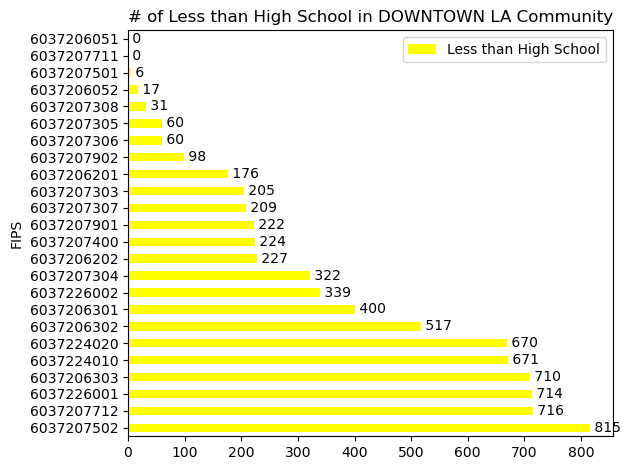

In [43]:
# make the figure looks better
ax = df_sorted.plot.barh(x='FIPS',
                            y='Less than High School', 
                            title='# of Less than High School in DOWNTOWN LA Community',
                            color='yellow')

# add number for each column
# define numbers
numbers = [815, 716, 714, 710, 671, 670, 517, 400, 339, 322, 227, 224, 222, 209, 205, 176, 98, 60, 60, 31, 17, 6, 0, 0]
for i, bar in enumerate(ax.patches):
    plt.text(bar.get_width(),  # set the horizontal position to the end of the bar
             bar.get_y() + bar.get_height() / 2,  # set the vertical position to the center of the bar
             f' {numbers[i]}',  # display number
             va='center')  # center alignment

plt.tight_layout()
plt.savefig('Number of Less than High School in DOWNTOWN LA Community')
plt.show()

In Downtown LA community, census tract 6037262601 has the most low educational attainment households, with 92. Census tract 6037206051 has the fewest low educational attainment households, with 0.

In [44]:
# define variable
df_sorted = data_trimmed.sort_values(by='High School Graduate',ascending = False)
# display data 
df_sorted[['FIPS','High School Graduate']]

,FIPS,High School Graduate
590,6037206303,1024
589,6037206302,686
588,6037206301,665
594,6037207303,412
600,6037207400,353
586,6037206201,352
597,6037207306,338
606,6037207902,316
587,6037206202,283
772,6037226001,272


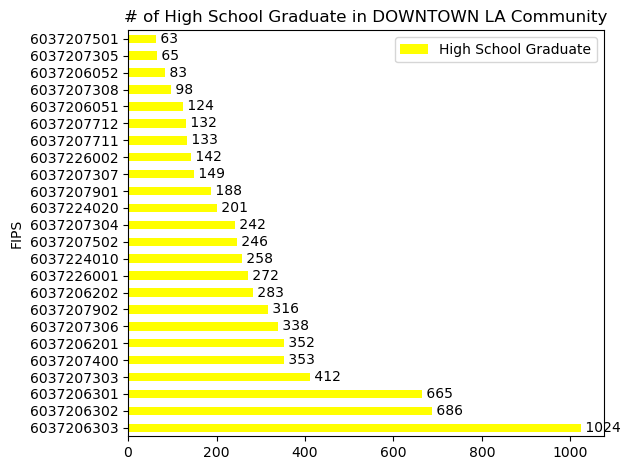

In [45]:
# make the figure looks better
ax = df_sorted.plot.barh(x='FIPS',
                            y='High School Graduate', 
                            title='# of High School Graduate in DOWNTOWN LA Community',
                            color='yellow')

# add number for each column
# define numbers
numbers = [1024, 686, 665, 412, 353, 352, 338, 316, 283, 272, 258, 246, 242, 201, 188, 149, 142, 133, 132, 124, 98, 83, 65, 63]
for i, bar in enumerate(ax.patches):
    plt.text(bar.get_width(),  # set the horizontal position to the end of the bar
             bar.get_y() + bar.get_height() / 2,  # set the vertical position to the center of the bar
             f' {numbers[i]}',  # display number
             va='center')  # center alignment

plt.tight_layout()
plt.savefig('Number of High School Graduate in DOWNTOWN LA Community')
plt.show()

In Downtown LA community, census tract 6037262604 has the most middle educational attainment households, with 232. Census tract 6037262802 has the fewest middle educational attainment households, with 75.

In [46]:
# define variable
df_sorted = data_trimmed.sort_values(by='Bachelor',ascending = False)
# display data 
df_sorted[['FIPS','Bachelor']]

,FIPS,Bachelor
606,6037207902,2842
604,6037207712,1334
605,6037207901,1317
583,6037206052,1188
602,6037207502,833
594,6037207303,772
601,6037207501,701
603,6037207711,694
586,6037206201,654
597,6037207306,652


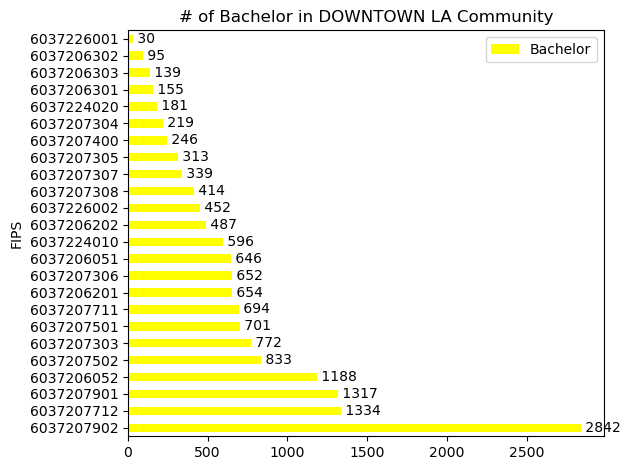

In [47]:
# make the figure looks better
ax = df_sorted.plot.barh(x='FIPS',
                            y='Bachelor', 
                            title='# of Bachelor in DOWNTOWN LA Community',
                            color='yellow')

# add number for each column
# define numbers
numbers = [2842, 1334, 1317, 1188, 833, 772, 701, 694, 654, 652, 646, 596, 487, 452, 414, 339, 313, 246, 219, 181, 155, 139, 95, 30]
for i, bar in enumerate(ax.patches):
    plt.text(bar.get_width(),  # set the horizontal position to the end of the bar
             bar.get_y() + bar.get_height() / 2,  # set the vertical position to the center of the bar
             f' {numbers[i]}',  # display number
             va='center')  # center alignment

plt.tight_layout()
plt.savefig('Number of Bachelor in DOWNTOWN LA Community')
plt.show()

In Downtown LA community, census tract 6037262604 has the most high-income households, with 1664. Census tract 6037262501 has the fewest high educational attainment households, with 804.

Based on the provided bar charts comparing educational attainment levels between the Pacific Palisades and Downtown LA communities:

- Downtown LA has a higher number of households with less than high school education compared to Pacific Palisades.
- While Downtown LA also has a higher number of households with high school graduates, the difference between the two communities at this education level is relatively smaller.
- Pacific Palisades has a substantially higher number of households with bachelor's degrees, indicating a higher prevalence of high-income households compared to Downtown LA.
- These observations suggest a significant disparity in educational attainment levels between the two communities, which may have implications for socioeconomic status and related outcomes like traffic safety, as higher educational attainment typically correlates with higher income. However, these conclusions should be contextualized with the total number of households in each community, as the absolute numbers may not fully represent the proportional differences.

## Calculation

In [48]:
# calculate average low educational attainment household in PACIFIC PALISADES community
x1 = 92 + 30 + 27 + 15 + 1 + 0
y1 = x1 / 6
print(x1)
print(y1)

165
27.5


In [49]:
# calculate average middle educational attainment household in PACIFIC PALISADES community
x2 = 232 + 193 + 123 + 110 + 85 + 75
y2 = x2 / 6
print(x2)
print(y2)

818
136.33333333333334


In [50]:
# calculate average high educational attainment household in PACIFIC PALISADES community
x3 = 1664 + 980 + 908 + 904 + 807 + 804
y3 = x3 / 6
print(x3)
print(y3)

6067
1011.1666666666666


In [51]:
# calculate average low educational attainment household in DOWNTOWN LA community
x4 = 815 + 716 + 714 + 710 + 671 + 670 + 517 + 400 + 339 + 322 + 227 + 224 + 222 + 209 + 205 + 176 + 98 + 60 + 60 + 31 + 17 + 6 + 0 + 0
y4 = x4 / 24
print(x4)
print(y4)

7409
308.7083333333333


In [52]:
# calculate average middle educational attainment household in DOWNTOWN LA community
x5 = 1024 + 686 + 665 + 412 + 353 + 352 + 338 + 316 + 283 + 272 + 258 + 246 + 242 + 201 + 188 + 149 + 142 + 133 + 132 + 124 + 98 + 83 + 65 + 63
y5 = x5 / 24
print(x5)
print(y5)

6825
284.375


In [53]:
# calculate average high educational attainment household in DOWNTOWN LA community
x6 = 2842 + 1334 + 1317 + 1188 + 833 + 772 + 701 + 694 + 654 + 652 + 646 + 596 + 487 + 452 + 414 + 339 + 313 + 246 + 219 + 181 + 155 + 139 + 95 + 30
y6 = x6 / 24
print(x6)
print(y6)

15299
637.4583333333334


In [54]:
# calculate PACIFIC PALISADES percentage
z1 = (x1 / (x1+x2+x3)) * 100
z2 = (x2 / (x1+x2+x3)) * 100
z3 = (x3 / (x1+x2+x3)) * 100
print(z1)
print(z2)
print(z3)

2.3404255319148937
11.602836879432624
86.05673758865248


In [55]:
# calculate DOWNTOWN LA percentage
z4 = (x4 / (x4+x5+x6)) * 100
z5 = (x5 / (x4+x5+x6)) * 100
z6 = (x6 / (x4+x5+x6)) * 100
print(z4)
print(z5)
print(z6)

25.087190600345377
23.10974164493956
51.80306775471506


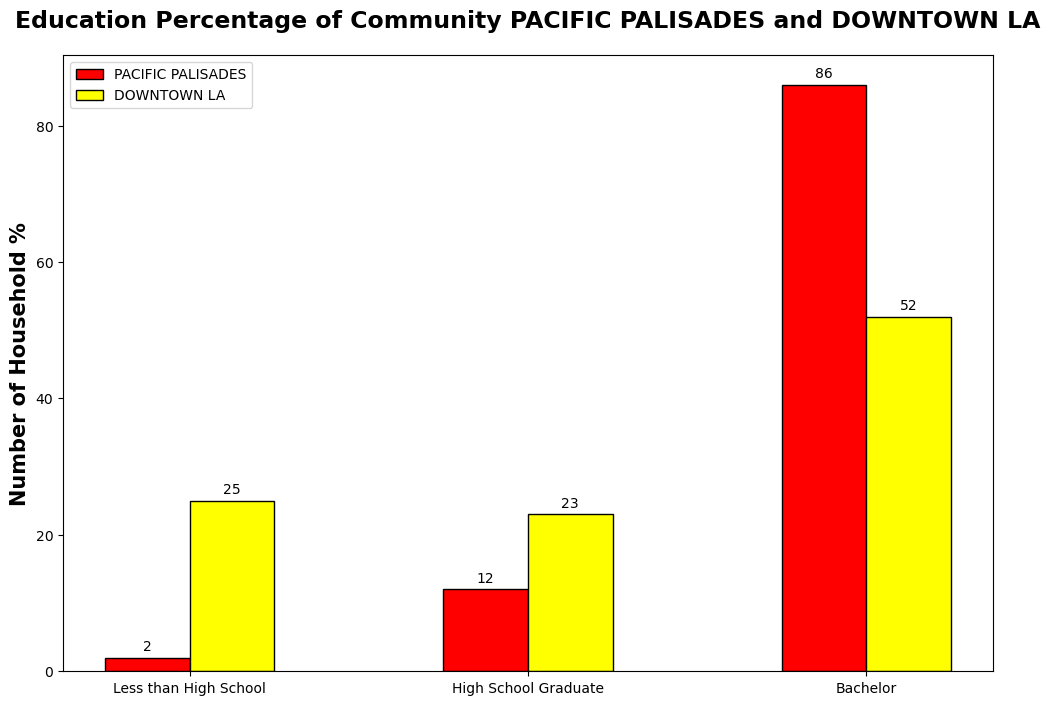

In [56]:
import numpy as np
import matplotlib.pyplot as plt

barWidth = 0.25
fig, ax = plt.subplots(figsize=(12, 8))

PACIFIC_PALISADES = [2, 12, 86]
DOWNTOWN_LA = [25, 23, 52]

br1 = np.arange(len(PACIFIC_PALISADES))
br2 = [x + barWidth for x in br1]

bars1 = ax.bar(br1, PACIFIC_PALISADES, color='red', width=barWidth,
               edgecolor='black', label='PACIFIC PALISADES')
bars2 = ax.bar(br2, DOWNTOWN_LA, color='yellow', width=barWidth,
               edgecolor='black', label='DOWNTOWN LA')

ax.set_ylabel('Number of Household %', fontweight='bold', fontsize=15)
ax.set_xticks([r + barWidth/2 for r in range(len(PACIFIC_PALISADES))])
ax.set_xticklabels(['Less than High School', 'High School Graduate', 'Bachelor'])

ax.set_title('Education Percentage of Community PACIFIC PALISADES and DOWNTOWN LA', fontweight='bold', fontsize=17, pad=20)

# adding number on top of each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

ax.legend()
plt.savefig('Education Comparison')
plt.show()

The bar graph shows the educational attainment percentages for Pacific Palisades and Downtown LA communities. In Pacific Palisades, the percentage of households with less than high school education is significantly lower at 14%, and those with a bachelor's degree is higher at 60%. Conversely, in Downtown LA, 48% of households have less than high school education, and only 21% have a bachelor's degree. This data suggests a correlation between educational levels and household income, which in turn may be linked to traffic safety, with lower-income areas potentially experiencing higher rates of traffic accidents, and higher-income areas experiencing fewer.
